Evolutionary dynamics of organised crime and terrorist networks in an network explicit configuration
---

Louis Weyland

In [118]:
"""Importing all the modules."""
import logging
import os
import sys

import matplotlib.pyplot as plt
from IPython.display import IFrame

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from network_utils.network_converter import NetworkConverter
    from network_utils.network_reader import NetworkReader
    from network_utils.network_stats import NetworkStats
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

In [119]:
# Set logger
logger = logging.getLogger("logger")
logger.setLevel(logging.INFO)

# Set plotter
plotter = Plotter()
plotter.args.draw_network = "n"

In [120]:
IFrame(
    "https://www.nature.com/articles/s41598-019-46141-8.pdf",
    width=500,
    height=250,
)

### Criminal Data used

For this simulation, data collected about the mafia in Sicilian has been used
<iframe src="https://zenodo.org/record/3938818#.YmaSbVxBxFH" width="600" height="500"></iframe

### Overview of the data

In [121]:
# Get stats about network_obj
nx_network = NetworkReader().get_data("montagna_calls")
logger.info(f"The data used is {nx_network.name}")
nk_network = NetworkConverter.nx_to_nk(nx_network)
network_stats = NetworkStats(nk_network)
network_stats.get_overview()

INFO:logger:The data used is montagna_phone_calls
INFO:logger:Number of components = 5
/home/louis/.local/share/virtualenvs/criminal_network_analysis-7tqkjw2s/lib/python3.8/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:logger:Lognormal is preferred over powerlaw, p_value = 0.0003
INFO:logger:Density = 0.026875699888017916
INFO:logger:Relative Density = 0.026875699888017916


----------------------------
Network Properties:
nodes, edges			95, 120
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026876
clustering coefficient		0.116725
min/max/avg degree		1, 25, 2.526316
degree assortativity		-0.074455
number of connected components	5
size of largest component	84 (88.42 %)
Communities detected in 0.00228 [s]
solution properties:
-------------------  ---------
# communities         9
min community size    2
max community size   23
avg. community size  10.5556
modularity            0.631285
-------------------  ---------
Calculating best minimal value for power law fit


INFO:logger:Number of components = 5
                                                             

----------------------------


INFO:logger:Radius = 1
INFO:logger:Dispersion criterion is 8.150>2 -> A giant component is present!


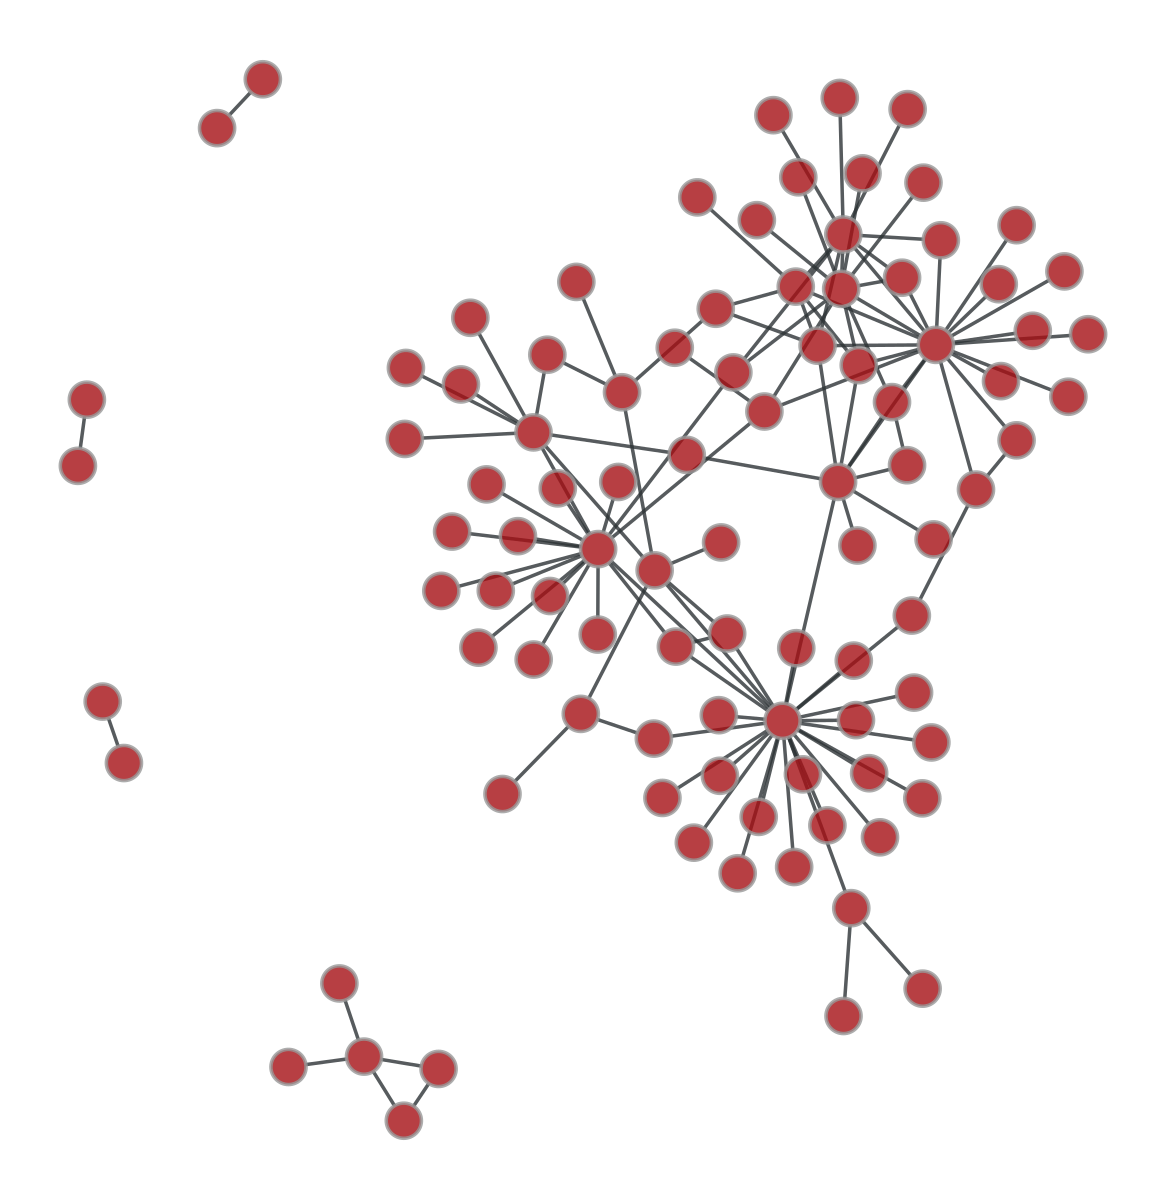

In [122]:
# Plot the network
gt_network = NetworkConverter.nx_to_gt(nx_network)
plotter.draw_network(gt_network)

Calculating best minimal value for power law fit
is_powerlaw=(False, 2.6963785729521623)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:logger:Lognormal is preferred over powerlaw, p_value = 0.0003


<AxesSubplot:xlabel='Degree', ylabel='Count'>

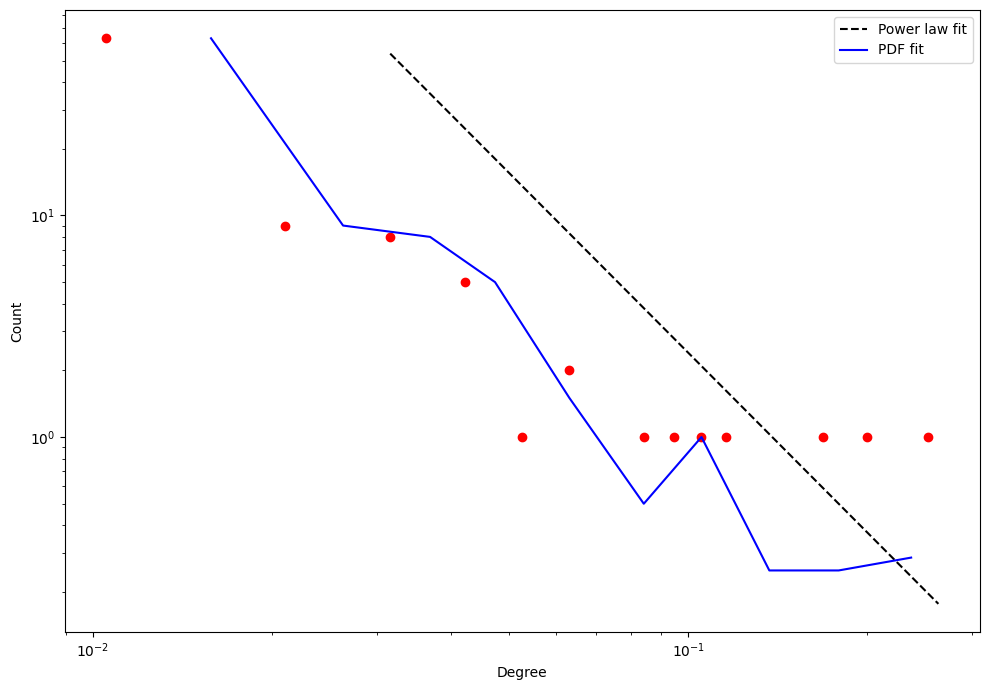

In [123]:
# Plot degree distribution
is_powerlaw = network_stats.check_if_powerlaw(network_stats.get_degree_distribution())
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Building around the data by using preferential attachment

INFO:logger:Given the ratio param, 855            nodes are added, total = 950 nodes!
Adding nodes to existing network using preferential attachment...: 100%|██████████| 855/855 [00:00<00:00, 15143.68it/s]
Adding attributes to nodes: 100%|██████████| 855/855 [00:00<00:00, 35164.34it/s]


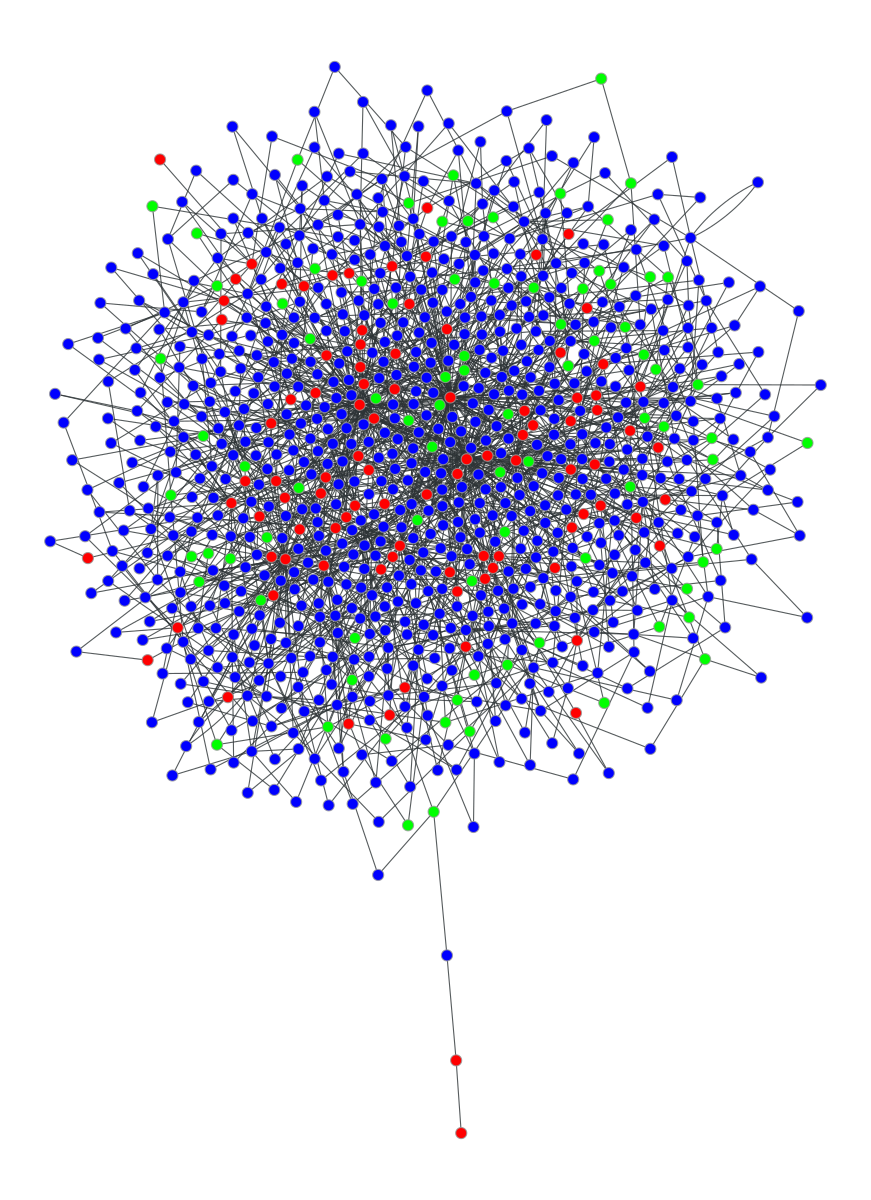

In [124]:
# Adding nodes based on preferential attachment

simulators = SimMartVaq(network=gt_network, ratio_honest=0.8, ratio_wolf=0.1)
simulators.network = simulators.initialise_network(
    network=simulators.network, n_new_edges=2
)
plotter.draw_network(network=simulators.network, color_vertex_property="state_color")

In [125]:
# Get overview of the new network
complete_network_stats = NetworkStats(NetworkConverter.gt_to_nk(simulators.network))
complete_network_stats.get_overview()

INFO:logger:Number of components = 1
/home/louis/.local/share/virtualenvs/criminal_network_analysis-7tqkjw2s/lib/python3.8/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:logger:Lognormal is preferred over powerlaw, p_value = 0.0041
INFO:logger:Density = 0.008088292385336366
INFO:logger:Relative Density = 0.008088292385336366
INFO:logger:Number of components = 1
INFO:logger:Diameter = 9


----------------------------
Network Properties:
nodes, edges			950, 3646
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.008088
clustering coefficient		0.019888
min/max/avg degree		2, 174, 7.675789
degree assortativity		0.165574
number of connected components	1
size of largest component	950 (100.00 %)
Communities detected in 0.00451 [s]
solution properties:
-------------------  ----------
# communities          7
min community size   123
max community size   146
avg. community size  135.714
modularity             0.505103
-------------------  ----------
Calculating best minimal value for power law fit


----------------------------


INFO:logger:Radius = 5
INFO:logger:Dispersion criterion is 24.628>2 -> A giant component is present!


Calculating best minimal value for power law fit
is_powerlaw=(False, 3.139096547137576)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:logger:Lognormal is preferred over powerlaw, p_value = 0.0041


<AxesSubplot:xlabel='Degree', ylabel='Count'>

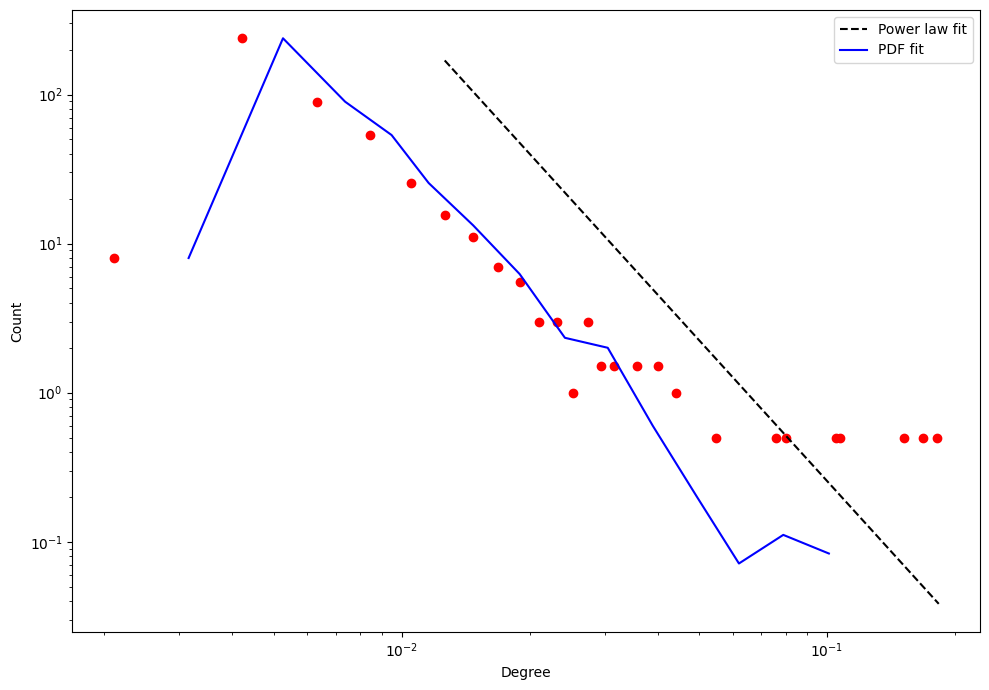

In [126]:
# Plot degree distribution
is_powerlaw = complete_network_stats.check_if_powerlaw(
    complete_network_stats.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Dividing the network into groups

INFO:logger:Given the ratio param, 23            nodes are added, total = 118 nodes!
Adding nodes to existing network using preferential attachment...: 100%|██████████| 23/23 [00:00<00:00, 15425.17it/s]
Adding attributes to nodes: 100%|██████████| 23/23 [00:00<00:00, 28010.74it/s]


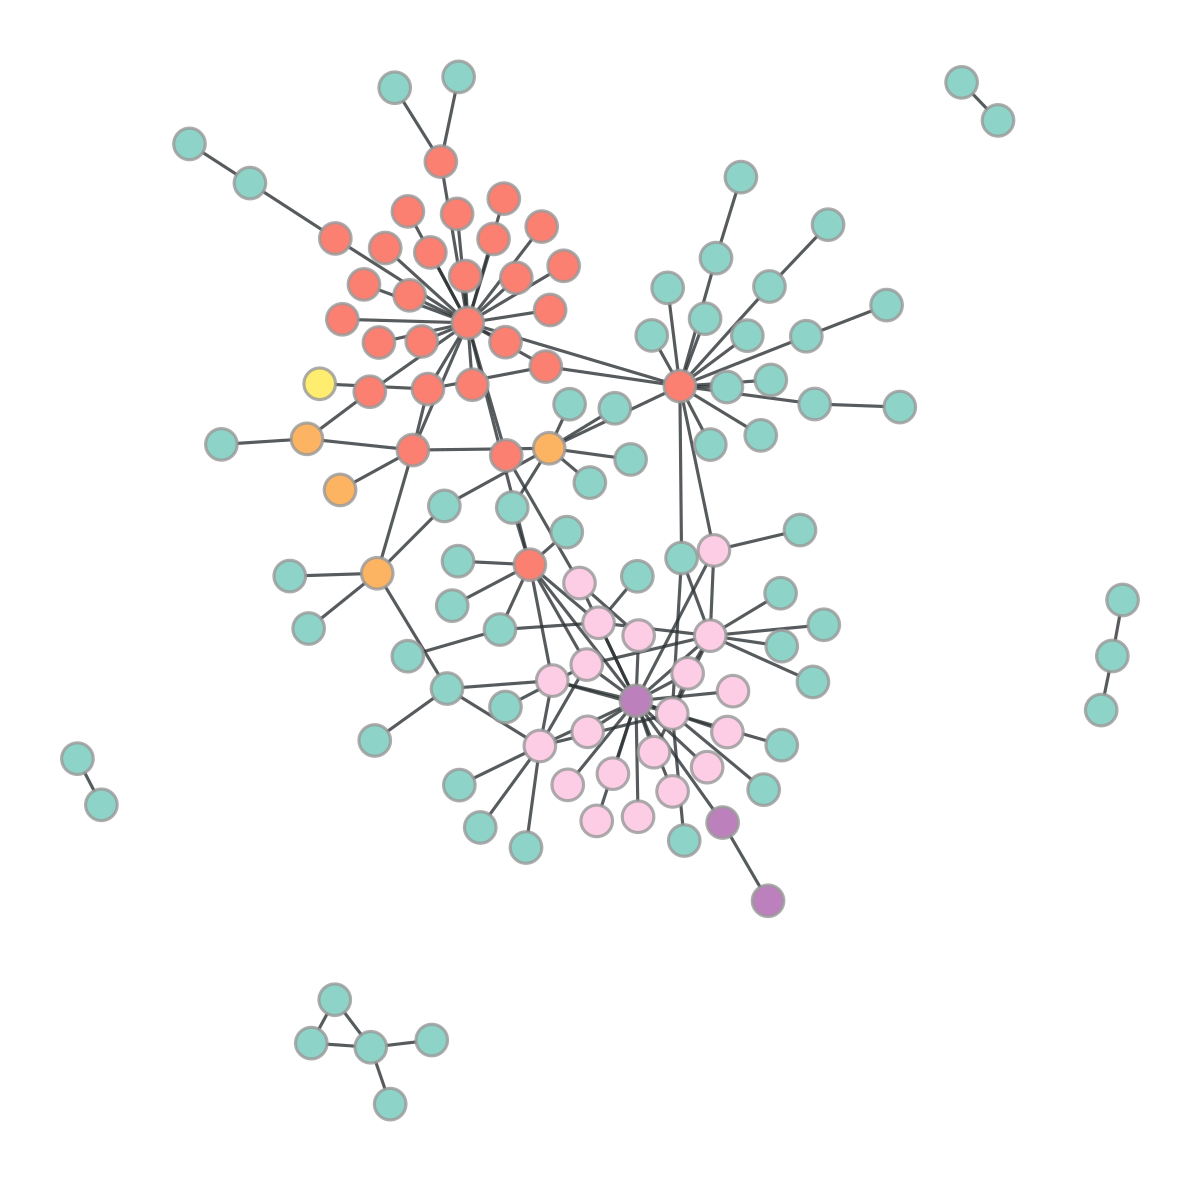

In [127]:
# Dividing network into groups
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(network=gt_network, ratio_honest=0.1, ratio_wolf=0.1)
simulators.network = simulators.initialise_network(
    network=simulators.network, n_new_edges=1
)
group_dict = simulators.select_multiple_communities(
    simulators.network, radius=2, min_grp=5, max_grp=6
)
color_code = simulators.network.new_vertex_property("int")
simulators.network.vertex_properties["group_color"] = color_code
for k, v in group_dict.items():
    for mbr in v:
        simulators.network.vp.group_color[simulators.network.vertex(mbr)] = k

plotter.draw_network(simulators.network, color_vertex_property="group_color")

### Run simulation

In [128]:
SimMartVaq.__init__?

Signature:
SimMartVaq.__init__(
    self,
    network: graph_tool.Graph,
    ratio_honest: float = 0.7,
    ratio_wolf: float = 0.1,
    n_new_edges: int = 2,
    delta: int = 0,
    tau: int = 0,
    gamma: float = 0.5,
    beta_s: int = 0,
    beta_h: int = 10,
    beta_c: int = 400,
    c_w: int = 1,
    c_c: int = 1,
    r_w: int = 1,
    r_c: int = 1,
    temperature: int = 10,
    mutation_prob: float = 0.3,
) -> None
Docstring: Init the network charaterisics.
File:      ~/git/criminal_network_analysis/src/simulators/sim_mart_vaq.py
Type:      function


INFO:logger:Given the ratio param, 380            nodes are added, total = 475 nodes!
Adding nodes to existing network using preferential attachment...: 100%|██████████| 380/380 [00:00<00:00, 15341.57it/s]
Playing the rounds...: 100%|██████████| 300/300 [00:10<00:00, 27.86it/s]


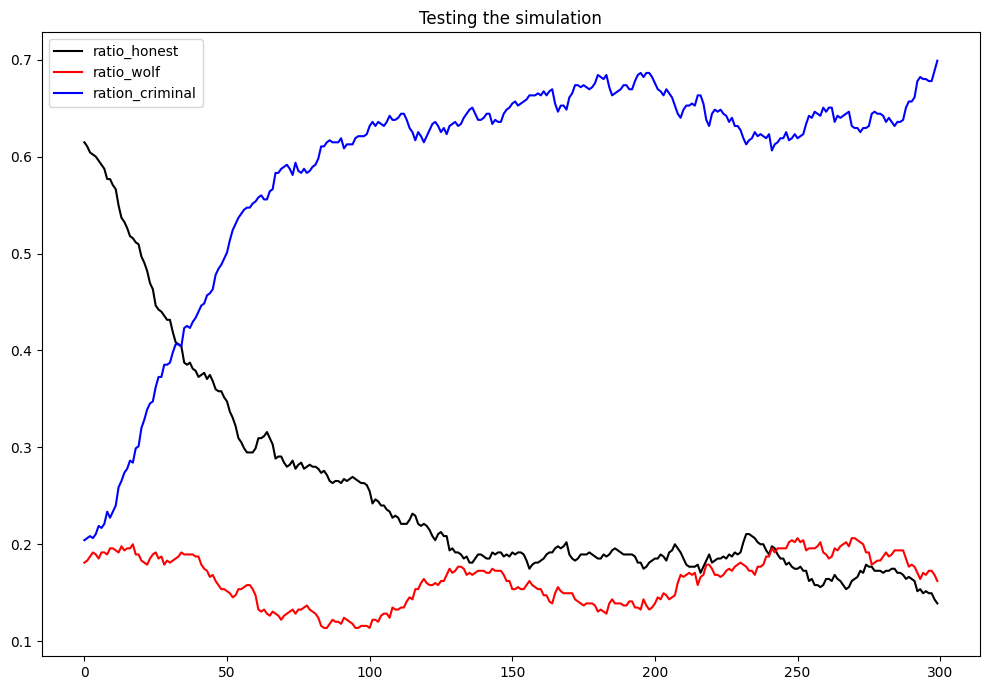

In [129]:
# Run simulation
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(network=gt_network, ratio_honest=0.65, ratio_wolf=0.15)
network, data_collector = simulators.play(network=simulators.network, rounds=300)
# Show the data
ax = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["ratio_honest", "ratio_wolf", "ration_criminal"],
    title="Testing the simulation",
)
ax.legend()
plt.show()

INFO:logger:Given the ratio param, 379            nodes are added, total = 474 nodes!
Adding nodes to existing network using preferential attachment...: 100%|██████████| 379/379 [00:00<00:00, 14715.09it/s]
Playing the rounds...:   2%|▏         | 47/2000 [00:01<00:44, 44.30it/s]/home/louis/git/criminal_network_analysis/src/simulators/sim_mart_vaq.py:637: RuntimeWarning: overflow encountered in exp
  ) -> gt.Graph:
Playing the rounds...: 100%|██████████| 2000/2000 [00:44<00:00, 44.71it/s]


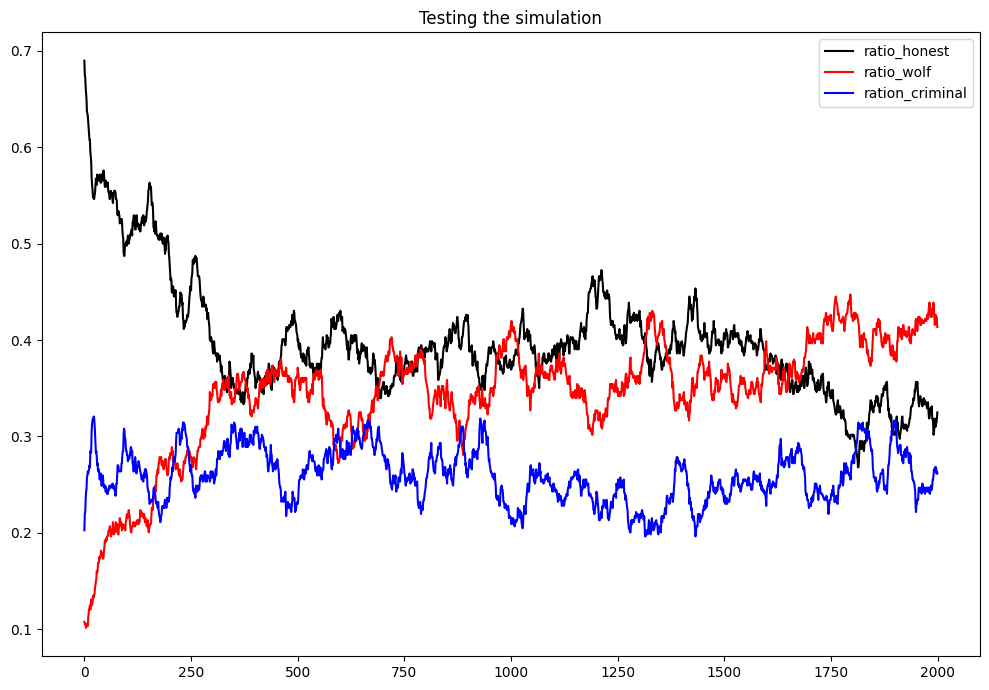

In [130]:
# Run simulation 2
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(
    network=gt_network, ratio_honest=0.7, ratio_wolf=0.1, beta_s=5000, beta_h=5000
)
network, data_collector = simulators.play(network=simulators.network, rounds=2000)
# Show the data
ax = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["ratio_honest", "ratio_wolf", "ration_criminal"],
    title="Testing the simulation",
)
ax.legend()
plt.show()